<a href="https://colab.research.google.com/github/Cul-Dude/Handwritten-Digit-Prediction/blob/main/Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOADING DATASET


In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.regularizers import l2

In [ ]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))
#thus all are numpy arrays

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# GETTING TO KNOW THE DATASET

### x_train and x_test

In [ ]:
print(x_train.shape)
print(x_train[0].shape)
print("Min pixel value = ",x_train[0].min())
print("Max pixel value = ",x_train[0].max())
print("Unique Values = ",np.unique(x_train))

(60000, 28, 28)
(28, 28)
Min pixel value =  0
Max pixel value =  255
Unique Values =  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 2

In [ ]:
print(x_test[0].shape) # one element of the array is a 2D array
print("Min pixel value = ",x_test[0].min())
print("Max pixel value = ",x_test[0].max())
print("Unique Values = ",np.unique(x_test))

(28, 28)
Min pixel value =  0
Max pixel value =  255
Unique Values =  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 2

Thus, each element of  arrays x_train and x_test arrays is a 2D matrix, of size 28 X 28 and each value in that 2D matrix is the pixel values of the 28 X 28 image

### y_train and y_test

In [ ]:
print("Shape of y_train = ",y_train.shape)
print("Unique Values = ",np.unique(y_train))


Shape of y_train =  (60000,)
Unique Values =  [0 1 2 3 4 5 6 7 8 9]


In [ ]:
print("Shape of y_test = ",y_test.shape)
print("Unique Values = ",np.unique(y_test))

Shape of y_test =  (10000,)
Unique Values =  [0 1 2 3 4 5 6 7 8 9]


In [ ]:
x_train[0]
# on clicking show data we can see a 28 by 28 2D matrix having the pixel values

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [ ]:
y_train[0]

5

In [ ]:
x_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  84, 185, 159, 151,  60,  36,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 222, 254, 254, 254, 254, 241, 198,
        198, 198, 198, 198, 198, 198, 198, 170,  52,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  67, 114,  72, 114, 163, 227, 254,
        225, 254, 254, 254, 250, 229, 254, 254, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  17,  66,
         14,  67,  67,  67,  59,  21, 236, 254, 106,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  83, 253, 209,  18,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  22, 233, 255,  83,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 129, 254, 238,  44,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  59, 249, 254,  62,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 133, 254, 187,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   9, 205, 248,  58,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 126, 254, 182,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  75, 251, 240,  57,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         19, 221, 254, 166,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        203, 254, 219,  35,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,
        254, 254,  77,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 224,
        254, 115,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 254,
        254,  52,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
y_test[0]

7

So the y_train and y_test are 1 dimensional numpy arrays, consisting of numbers from 0 to 9, which classifies corresponding images to its value

# DATA PREPOSSESING


In [ ]:
x_train=x_train.reshape(-1,28*28)
x_test=x_test.reshape(-1,28*28)
print(x_train.shape)
print(x_test.shape)
#NOW BOTH ARE 2 dimensional arrays

(60000, 784)
(10000, 784)


In [ ]:
print(x_train.max())
print(x_train.min())

255
0


As we can see the values of x ranges from 0 to 255, therefore we will normalise the dataset so that we get values of lesser range, so that the gradient descent works prefectly i.e, our model works faster

In [ ]:
x_train=x_train/255
x_test=x_test/255
print("Range of x_train is :", x_train.min(),"and",x_train.max())
print("Range of x_test is: ", x_test.min(),"and",x_test.max())

Range of x_train is : 0.0 and 1.0
Range of x_test is:  0.0 and 1.0


In [ ]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
# making cross validation set from the training set
x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train,test_size=0.2,random_state=42)
print("New shape of x_train = ",x_train.shape)
print("New shape of x_test = " ,x_cv.shape)
print("New shape of y_train = ",y_train.shape)
print("New shape of y_test = ",y_cv.shape)

New shape of x_train =  (48000, 784)
New shape of x_test =  (12000, 784)
New shape of y_train =  (48000,)
New shape of y_test =  (12000,)


# BUILDING A NEURAL NETWORK

## ATTEMPT 1

In [ ]:
model=Sequential(
    [
        Dense(units=25,activation='relu'),
        Dense(units=15,activation='relu'),
        Dense(units=10,activation='softmax')
    ]
)

model.compile(loss=SparseCategoricalCrossentropy(),optimizer='Adam',metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, validation_data=(x_cv, y_cv))

Epoch 1/20
1500/1500 [==============================] - 9s 5ms/step - loss: 0.4788 - accuracy: 0.8616 - val_loss: 0.2544 - val_accuracy: 0.9266
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2246 - accuracy: 0.9356 - val_loss: 0.2067 - val_accuracy: 0.9398
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1846 - accuracy: 0.9460 - val_loss: 0.1772 - val_accuracy: 0.9481
Epoch 4/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1616 - accuracy: 0.9523 - val_loss: 0.1687 - val_accuracy: 0.9513
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1452 - accuracy: 0.9569 - val_loss: 0.1745 - val_accuracy: 0.9483
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1306 - accuracy: 0.9614 - val_loss: 0.1584 - val_accuracy: 0.9513
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1206 - accuracy: 0.9632 - val_loss: 0.1468 - val_accuracy:

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(x_cv, y_cv)
print("Validation loss = ",loss)
print("Validation accuracy = ",accuracy)

375/375 [==============================] - 1s 2ms/step - loss: 0.1460 - accuracy: 0.9613
Validation loss =  0.14601173996925354
Validation accuracy =  0.9612500071525574


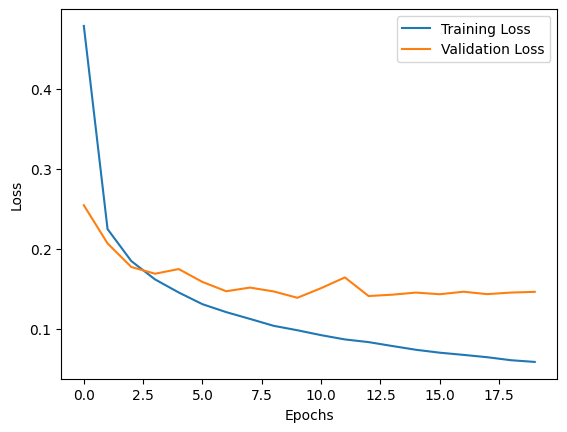

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The model seems to learn good on training data, but doesn't work well on cross validation set, it means we can add more hyper parameters

## ATTEMPT 2

As the model was predicting very good on training set, but didn't perform well on validation set, thus it means that model is overfitting. So to solve that , I  added L2 Regularization to each layers

In [ ]:
model2=Sequential(
    [
        Dense(units=25,activation='relu',name="layer1",kernel_regularizer=l2(0.01)),
        Dense(units=10,activation='relu',name="layer2",kernel_regularizer=l2(0.01)),
        Dense(units=10,activation='softmax',name="output",kernel_regularizer=l2(0.01))
    ])

model2.compile(loss=SparseCategoricalCrossentropy(),optimizer='Adam',metrics=['accuracy'])

history2=model2.fit(x_train,y_train,epochs=20,validation_data=(x_cv,y_cv))


Epoch 1/20
1500/1500 [==============================] - 6s 3ms/step - loss: 1.0917 - accuracy: 0.8040 - val_loss: 0.8210 - val_accuracy: 0.8997
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.8192 - accuracy: 0.8952 - val_loss: 0.7985 - val_accuracy: 0.8975
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7984 - accuracy: 0.9010 - val_loss: 0.7892 - val_accuracy: 0.9038
Epoch 4/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.7915 - accuracy: 0.9008 - val_loss: 0.7853 - val_accuracy: 0.9013
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7857 - accuracy: 0.9022 - val_loss: 0.7750 - val_accuracy: 0.9047
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7826 - accuracy: 0.9032 - val_loss: 0.7769 - val_accuracy: 0.9042
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7793 - accuracy: 0.9040 - val_loss: 0.7746 - val_accuracy:

In [ ]:
# Evaluate the model
loss, accuracy = model2.evaluate(x_cv, y_cv)
print("Validation loss = ",loss)
print("Validation accuracy = ",accuracy)

375/375 [==============================] - 1s 2ms/step - loss: 0.7539 - accuracy: 0.9135
Validation loss =  0.7539293766021729
Validation accuracy =  0.9135000109672546


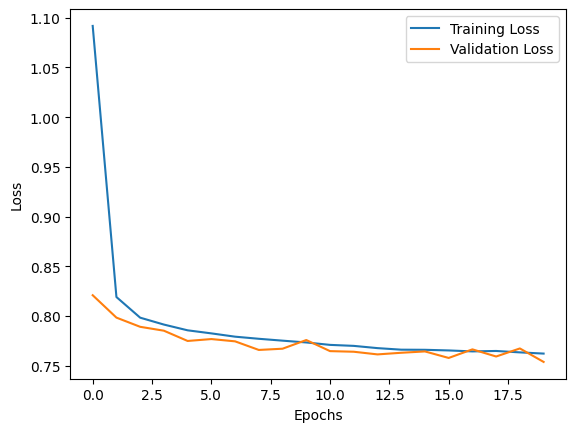

In [ ]:
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## ATTEMPT 3

Changed the model's architechture

In [ ]:
model3=Sequential(
    [
        Dense(units=130,activation='relu',name="layer1"),
        Dense(units=60,activation='relu',name="layer2"),
        Dense(units=30,activation='relu',name="layer3"),
        Dense(units=10,activation='softmax',name="output")
    ])


model3.compile(optimizer="Adam", loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

history3=model3.fit(x_train,y_train,epochs=20,validation_data=(x_cv,y_cv))

Epoch 1/20
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2839 - accuracy: 0.9152 - val_loss: 0.1415 - val_accuracy: 0.9578
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1153 - accuracy: 0.9653 - val_loss: 0.1056 - val_accuracy: 0.9673
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0799 - accuracy: 0.9755 - val_loss: 0.1019 - val_accuracy: 0.9687
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0625 - accuracy: 0.9806 - val_loss: 0.0983 - val_accuracy: 0.9720
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0496 - accuracy: 0.9844 - val_loss: 0.0956 - val_accuracy: 0.9728
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0410 - accuracy: 0.9867 - val_loss: 0.1056 - val_accuracy: 0.9707
Epoch 7/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0337 - accuracy: 0.9891 - val_loss: 0.1069 - val_accuracy

In [ ]:
# Evaluate the model
loss, accuracy = model3.evaluate(x_cv, y_cv)
print("Validation loss = ",loss)
print("Validation accuracy = ",accuracy)

375/375 [==============================] - 1s 3ms/step - loss: 0.1229 - accuracy: 0.9775
Validation loss =  0.1228826567530632
Validation accuracy =  0.9775000214576721


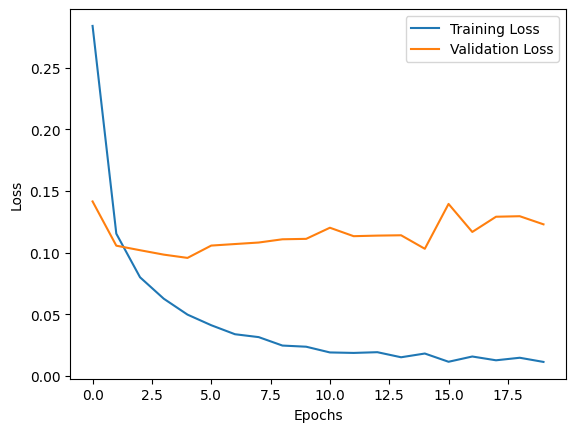

In [ ]:
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

This learns well on both the dataset(as we got lower loss than both the above models on both the dataset) but the loss curve for cross validation is not converging, thus this can't  be finalised as my final model.

## ATTEMPT 4

In this model, I added L2 regularization.

In [ ]:
model4 = Sequential([
    Dense(units=128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(units=64, activation='relu',  kernel_regularizer=l2(0.01)),
    Dense(units=32, activation='relu',  kernel_regularizer=l2(0.01)),
    Dense(units=10, activation='softmax', kernel_regularizer=l2(0.01))
])

model4.compile(optimizer="Adam", loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

history4 = model4.fit(x_train, y_train, epochs=20, validation_data=(x_cv, y_cv))

Epoch 1/20
1500/1500 [==============================] - 12s 7ms/step - loss: 1.2266 - accuracy: 0.8710 - val_loss: 0.9079 - val_accuracy: 0.9028
Epoch 2/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.8837 - accuracy: 0.9041 - val_loss: 0.8930 - val_accuracy: 0.8913
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.8508 - accuracy: 0.9082 - val_loss: 0.8428 - val_accuracy: 0.9068
Epoch 4/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.8349 - accuracy: 0.9119 - val_loss: 0.8249 - val_accuracy: 0.9169
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.8252 - accuracy: 0.9141 - val_loss: 0.8181 - val_accuracy: 0.9159
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.8195 - accuracy: 0.9144 - val_loss: 0.8022 - val_accuracy: 0.9219
Epoch 7/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.8141 - accuracy: 0.9150 - val_loss: 0.8024 - val_accuracy

In [ ]:
# Evaluate the model
loss, accuracy = model4.evaluate(x_cv, y_cv)
print("Validation loss = ",loss)
print("Validation accuracy = ",accuracy)

375/375 [==============================] - 1s 2ms/step - loss: 0.7702 - accuracy: 0.9234
Validation loss =  0.7701987028121948
Validation accuracy =  0.9234166741371155


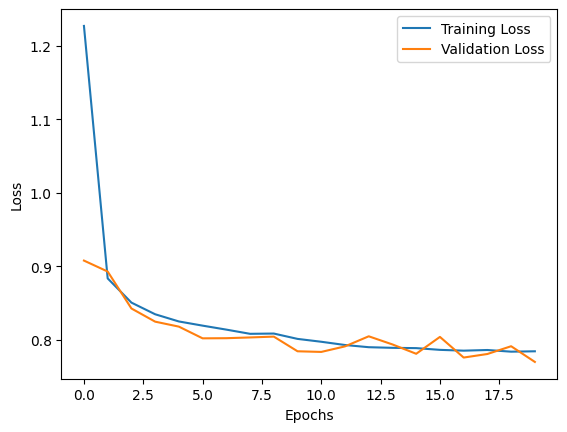

In [ ]:
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Again, though the model performs well on cross validation set(As its loss curve is decreasing and getting constant) still the loss has increased(the accuracy of model on cross validation set is decreased)

Thus this model can't be finalised as our final model.

## ATTEMPT 5

In this model, I changed the learning rate of Adam's optimizer.

In [ ]:
model5 = Sequential([
    Dense(units=128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(units=64, activation='relu',  kernel_regularizer=l2(0.01)),
    Dense(units=32, activation='relu',  kernel_regularizer=l2(0.01)),
    Dense(units=10, activation='softmax',  kernel_regularizer=l2(0.01))
])
# adding self defined learning rate in the adam's optimiser
optimizer1 = Adam(learning_rate=0.0001)
model5.compile(optimizer=optimizer1, loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

history5 = model5.fit(x_train, y_train, epochs=20, validation_data=(x_cv, y_cv))


Epoch 1/20
1500/1500 [==============================] - 11s 6ms/step - loss: 2.6637 - accuracy: 0.7697 - val_loss: 1.6104 - val_accuracy: 0.8948
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 1.3872 - accuracy: 0.9004 - val_loss: 1.2249 - val_accuracy: 0.9085
Epoch 3/20
1500/1500 [==============================] - 9s 6ms/step - loss: 1.1398 - accuracy: 0.9095 - val_loss: 1.0697 - val_accuracy: 0.9134
Epoch 4/20
1500/1500 [==============================] - 9s 6ms/step - loss: 1.0260 - accuracy: 0.9137 - val_loss: 0.9873 - val_accuracy: 0.9173
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.9631 - accuracy: 0.9154 - val_loss: 0.9361 - val_accuracy: 0.9205
Epoch 6/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.9238 - accuracy: 0.9171 - val_loss: 0.9082 - val_accuracy: 0.9173
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.8965 - accuracy: 0.9187 - val_loss: 0.8917 - val_accuracy

In [ ]:
# Evaluate the model
loss, accuracy = model5.evaluate(x_cv, y_cv)
print("Validation loss = ",loss)
print("Validation accuracy = ",accuracy)


375/375 [==============================] - 1s 2ms/step - loss: 0.8008 - accuracy: 0.9299
Validation loss =  0.8007879853248596
Validation accuracy =  0.9299166798591614


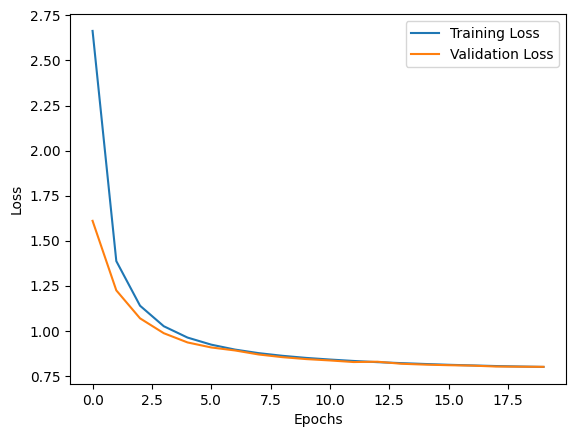

In [ ]:
plt.plot(history5.history['loss'], label='Training Loss')
plt.plot(history5.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

This problem comes again!. The loss curves looks good on both the datasets(as they are getting converged and getting constant). But the accuracy of model is decreased

## ATTEMPT 6

This time, again I changed the model's architecture by putting a Dropout of 0.2 and removing regularization on each layers.

In [ ]:
model6 = Sequential([
    Dense(units=128, activation='relu'),
    Dropout(0.2),
    Dense(units=64, activation='relu'),
    Dropout(0.2),
    Dense(units=32, activation='relu'),
    Dropout(0.2),
    Dense(units=10, activation='softmax', )
])

optimizer1 = Adam(learning_rate=0.0001)
model6.compile(optimizer=optimizer1, loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

history6 = model6.fit(x_train, y_train, epochs=20, validation_data=(x_cv, y_cv))


Epoch 1/20
1500/1500 [==============================] - 10s 6ms/step - loss: 1.0923 - accuracy: 0.6525 - val_loss: 0.3960 - val_accuracy: 0.8947
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5242 - accuracy: 0.8441 - val_loss: 0.2832 - val_accuracy: 0.9192
Epoch 3/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4112 - accuracy: 0.8803 - val_loss: 0.2347 - val_accuracy: 0.9317
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3381 - accuracy: 0.9060 - val_loss: 0.1987 - val_accuracy: 0.9409
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2909 - accuracy: 0.9177 - val_loss: 0.1752 - val_accuracy: 0.9477
Epoch 6/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2572 - accuracy: 0.9285 - val_loss: 0.1574 - val_accuracy: 0.9532
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2332 - accuracy: 0.9351 - val_loss: 0.1458 - val_accuracy

In [ ]:
# Evaluate the model
loss, accuracy = model6.evaluate(x_cv, y_cv)
print("Validation loss = ",loss)
print("Validation accuracy = ",accuracy)

375/375 [==============================] - 1s 2ms/step - loss: 0.0883 - accuracy: 0.9746
Validation loss =  0.08833010494709015
Validation accuracy =  0.9745833277702332


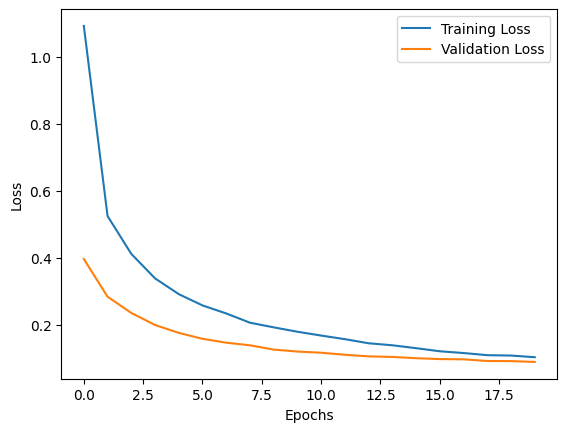

In [ ]:
plt.plot(history6.history['loss'], label='Training Loss')
plt.plot(history6.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

This is pretty good model, as both the losses are converging. And also accuracy of model on the cross validation set is good(loss on cross validation set is close to 0.1)

## ATTEMPT 7

As we can see that by increasing the complexity of models, the loss on training data and cross validation data is getting constant at very high level, i.e not learning further.

Thus this way we can say that making model simpler will increase our accruacy(like it happened in previous model)

Therefore this time, I changed the model's architecture again, changed it to three layers only.

In [ ]:
model7 = Sequential([
    Dense(units=512, activation='relu'),
    Dropout(0.2),
    Dense(units=512, activation='relu'),
    Dropout(0.2),
    Dense(units=10, activation='softmax')
])

optimizer1 = Adam(learning_rate=0.0001)
model7.compile(optimizer=optimizer1, loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

history7 = model7.fit(x_train, y_train, epochs=20, validation_data=(x_cv, y_cv))



Epoch 1/20
1500/1500 [==============================] - 20s 13ms/step - loss: 0.4591 - accuracy: 0.8715 - val_loss: 0.2088 - val_accuracy: 0.9403
Epoch 2/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.1983 - accuracy: 0.9431 - val_loss: 0.1464 - val_accuracy: 0.9577
Epoch 3/20
1500/1500 [==============================] - 19s 13ms/step - loss: 0.1428 - accuracy: 0.9586 - val_loss: 0.1170 - val_accuracy: 0.9655
Epoch 4/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.1114 - accuracy: 0.9669 - val_loss: 0.1030 - val_accuracy: 0.9685
Epoch 5/20
1500/1500 [==============================] - 17s 12ms/step - loss: 0.0905 - accuracy: 0.9727 - val_loss: 0.0919 - val_accuracy: 0.9712
Epoch 6/20
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0733 - accuracy: 0.9786 - val_loss: 0.0811 - val_accuracy: 0.9732
Epoch 7/20
1500/1500 [==============================] - 17s 12ms/step - loss: 0.0615 - accuracy: 0.9815 - val_loss: 0.0802 -

In [ ]:
# Evaluate the model
loss, accuracy = model7.evaluate(x_cv, y_cv)
print("Validation loss = ",loss)
print("Validation accuracy = ",accuracy)

375/375 [==============================] - 1s 3ms/step - loss: 0.0686 - accuracy: 0.9822
Validation loss =  0.06862402707338333
Validation accuracy =  0.9821666479110718


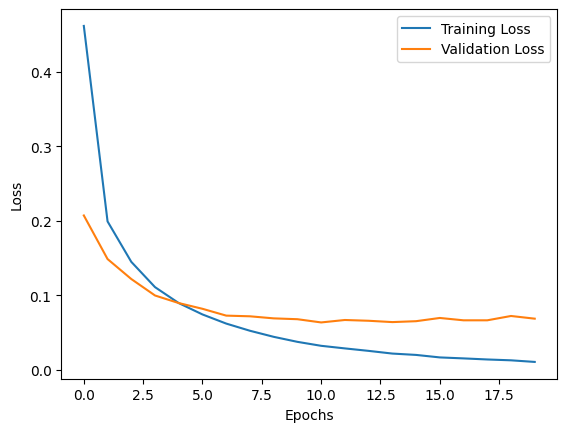

In [ ]:
plt.plot(history7.history['loss'], label='Training Loss')
plt.plot(history7.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Due to the following reasons, I selected this as my final model

*   It works well on training data
*   It learns well even on the cross validation set(error is less than 0.1)
*   And also it shows least error among all the other 6 models(accuracy is 98.25%, most among all)





# MODEL'S PERFORMANCE ON TEST DATA


In [ ]:
y_hat=model7.predict(x_test)
y_hat=np.argmax(y_hat,axis=1)
print("Model's prediction = ", y_hat[0:10])
print("Actual value =       ",y_test[0:10])

313/313 [==============================] - 3s 10ms/step
Model's prediction =  [7 2 1 0 4 1 4 9 5 9]
Actual value =        [7 2 1 0 4 1 4 9 5 9]


## MODEL'S EVALUATIONS AND ACCURACY ON TEST DATA

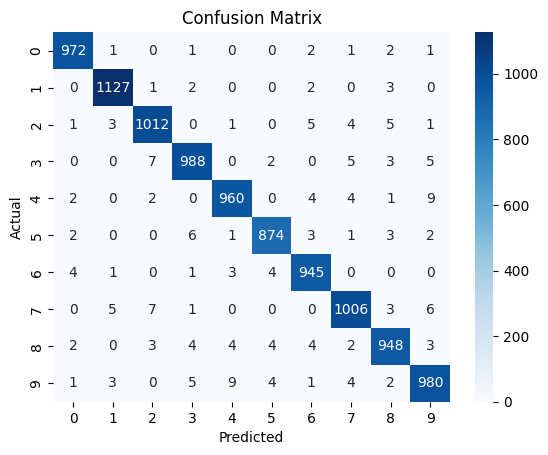

In [ ]:
cm=tf.math.confusion_matrix(y_test,y_hat)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2,3,4,5,6,7,8,9], yticklabels=[0, 1, 2,3,4,5,6,7,8,9])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, y_hat))
accuracy = accuracy_score(y_test, y_hat)
print("Accuracy = ",accuracy)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Accuracy =  0.9812


As we can see, it works pretty well on test data as well


*   Accuracy = 98 %
*   In confusion matrix too we can see it has predicted most of the classes correctly.


